In [5]:
import pandas as pd
import seaborn as sns

### Data Collection

In [3]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [6]:
df_train=pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')
df_test=pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')

### Data analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df_train


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [13]:
df_train.sample(10)

(1168, 17)

- On remarque la présence de variable catégorielle comme la variable GarageCars qui donné par une chaîne de caractère indiquant le nombre de voiture pouvant être contenu dans le garage.
- On remarque aussi que les colonnes 3SsnPorch,ScreenPorch,PoolArea, et Miscval sont principalement nulles dans l'échantillon observé
- On remarque une valeur aberrante de -1 dans la colonne GarageYrBlt pour indiquer l'absence de garage 

In [17]:
#On remarque la présence de variable catégorielle comme la variable GarageCars qui donné par une chaîne de caractère indiquant le nombre de voiture pouvant être contenu dans le garage.
#On remarque aussi que les colonnes 3SsnPorch,ScreenPorch,PoolArea, et Miscval sont principalement nulles dans l'échantillon observé
#On remarque une valeur aberrante de -1 dans la colonne GarageYrBlt pour indiquer l'absence de garage 

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

In [15]:
#les valeurs de nos données sont principalement entières ou réelles 

df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


In [29]:
#il y a trois valeurs manquantes 

df_train.describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


- Le nombre de chambre moyen est de 2.87. La majorité des maisons ont entre 2 et 3 chambres.
- Le nombre de cuisine moyen est de 1.04. La majorité des maisons ont 1 cuisine.
- Pour ce qui est des chambres la moyenne est de 6.5. Les maisons ont entre 5 et 7 chambres 
- Pour les fireplaces la moyenne est de 0.6 indiquant que la majorité des maisons ont entre 0 et 1 fireplaces
- La surface moyenne des garages est de 469 square feet avec un écart type de l'ordre de 210 suare feet indiquant une variation significative cela   peut être dû à l'absence de garage dans certain cas ou à la présnece de garage de grande taille (1418 saure feet pour le maximum)
- Les maisons ont en 91.9 square feet de planché en bois
- La surface moyenne de OpenporchSF est de 46.3 square feet avec un écart type de 67 square feet et la médiane est 24 ce qui conforte l'analyse que l'on avait faite précédemment 
- Même chose pour les EnclosedPorch,3SsnPorch,ScreenPorch et les piscines 75% des maisons n'en ont pas.
- En moyenne les maisons ont été achetés Juin, et pour ce qui est de l'année la moyenne est aux alentours de 2007.
- Le prix moyen des maisons est de 179163 dollars avec un écart type de 76848. On a que 75% des maisons valent en dessous de 212250 dollars. On a une valeur aberrante à 745000 dollars



Histograms of numerical features:


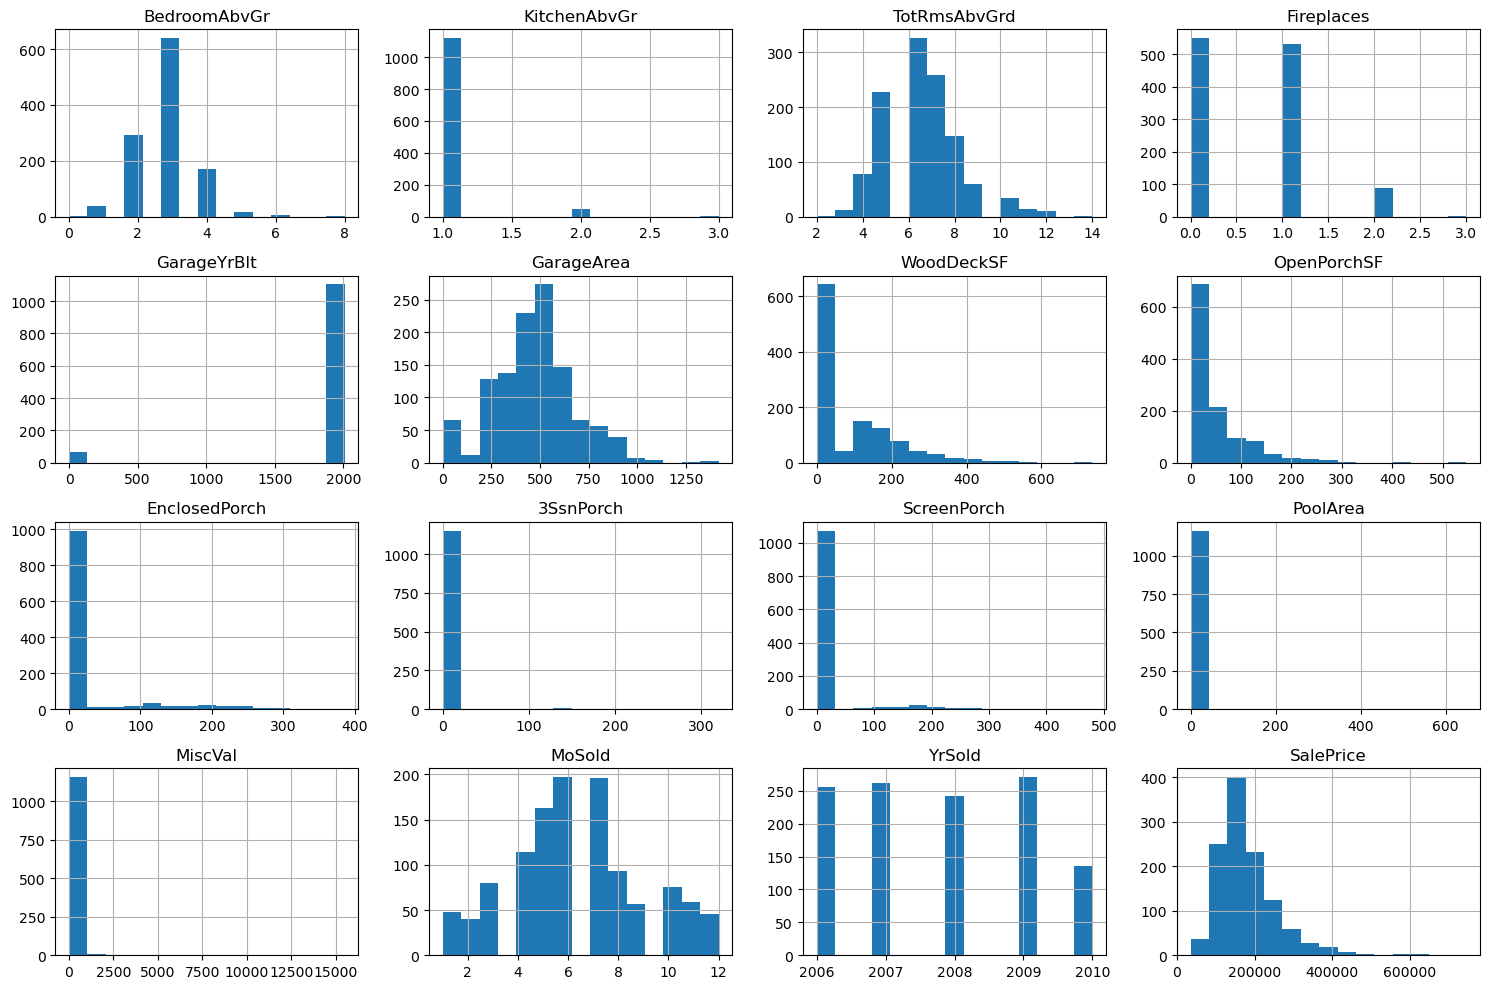

In [53]:
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())
print("\nHistograms of numerical features:")
df_train.hist(figsize=(15,10),bins=15)
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

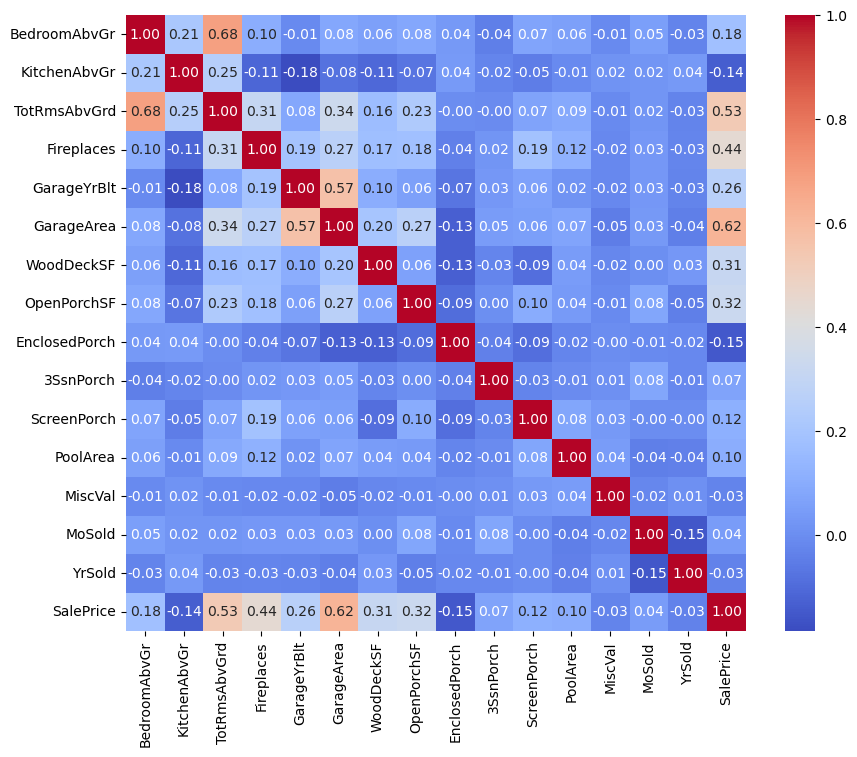

In [17]:
df_train=df_train.drop("GarageCars",axis=1)
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

On remarque que les variables vraiment significative sont:
 - GarageArea
 - TotRmsAbvGrd
 - Fireplaces
 - GarageYrBlt
 - OpenPorchSF
 - WoodDeckSF